In [1]:
from src.io_utils import load_data, coerce_numeric 

df = coerce_numeric(load_data("data/health_study_dataset.csv"))

#df.info()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy import stats

In [9]:
from src.metrics import HealthAnalyzer
from src.metrics import summary_stats, simulated_disease_proportion, ci_mean_normal, bootstrap_mean
from src import viz as V

analyzer = HealthAnalyzer(df)

In [ ]:
# Calculates a summary of statistics for age, weight, height, systolic_bp, cholesterol

stats_df = summary_stats(df)

stats_summary = stats_df.rename(
    columns= {
    "age": "Age (years)",
    "weight": "Weight (kg)",
    "height": "Height (cm)", 
    "systolic_bp": "Systolic Blood Pressure (mmHg)",
    "cholesterol": "Cholesterol (mmol(L)"
})
stats_summary.round(1)


,Age (years),Height (cm),Weight (kg),Systolic Blood Pressure (mmHg),Cholesterol (mmol(L)
mean,49.4,171.8,73.4,149.2,4.9
median,50.0,171.4,73.2,149.4,5.0
min,18.0,144.4,33.7,106.8,2.5
max,90.0,200.4,114.4,185.9,7.9


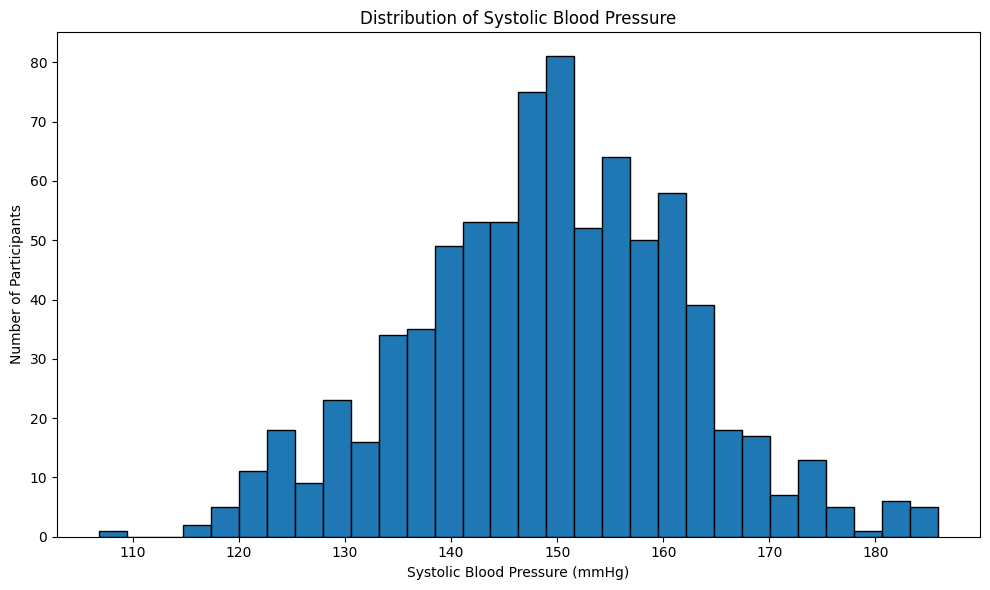

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
V.hist(ax, df["systolic_bp"], "Distribution of Systolic Blood Pressure", "Systolic Blood Pressure (mmHg)", "Number of Participants", bins=30, edgecolor= "black")
plt.tight_layout()

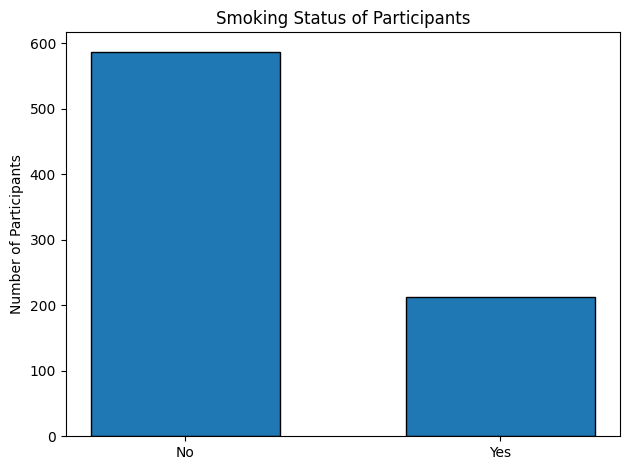

In [ ]:
# Bar plot of smokers vs non-smokers

total_smokers = df["smoker"].value_counts()

answers = total_smokers.index
counts = total_smokers.values

fig, ax = plt.subplots()

V.bar(ax, answers, counts, "Smoking Status of Participants", "", "Number of Participants", edgecolor="black", width=0.6)
plt.xticks(rotation=0)
plt.tight_layout()

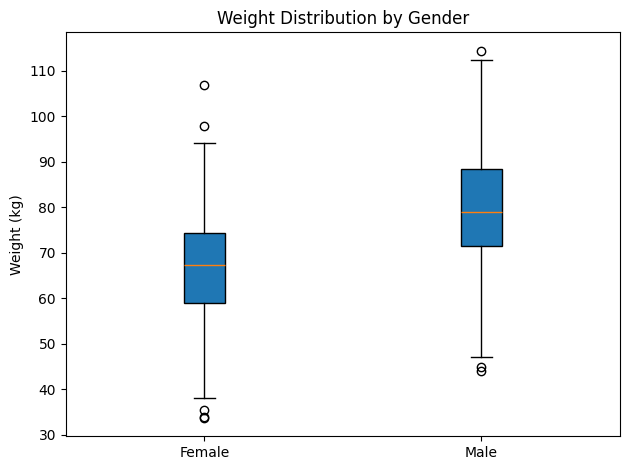

In [ ]:

female_weight = df[df["sex"] == "F"]["weight"]
male_weight = df[df["sex"] == "M"]["weight"]

fig, ax = plt.subplots()

V.boxplot(ax, [female_weight, male_weight], "Weight Distribution by Gender", "Weight (kg)", labels=["Female", "Male"])
plt.tight_layout()

In [ ]:
np.random.seed(42)
results = simulated_disease_proportion(df)

print(f"Actual proportion of participants with the disease: {results['disease_count']:.2%}")
print(f"Simulated proportion of participants with the disease: {results['simulated_count']:.2%}")
print(f"The difference: {results['difference']:.2%}")

Actual proportion of participants with the disease: 5.88%
Simulated proportion of participants with the disease: 6.30%
The difference: -0.43%


In [ ]:
# Calculate the true mean of systolic blood pressure
print(f"True mean of systolic blood pressure: {sbp_mean(df)}")

True mean of systolic blood pressure: 149.178625


In [12]:
# Calculate the true mean of systolic blood pressure
print(f"True mean of systolic blood pressure: {analyzer.sbp_mean()}")

True mean of systolic blood pressure: 149.178625


In [ ]:
# Calculate sample statistics for systolic blood pressure

np.random.seed(35)

sbp = df["systolic_bp"]

n = 40 
x = np.random.choice(sbp, size=n, replace=True)

mean_x = float(np.mean(x))
std = float(np.std(x, ddof=1))
se = std / np.sqrt(n)
mean_x, std, n, se

In [ ]:
lo, hi, mean_x, std, n = ci_mean_normal(x)

true_mean = float(sbp_mean(df))

(lo, hi), mean_x, std, n, true_mean

In [15]:
#bootstrap hypothesis test on smokers vs non-smokers
hypothesis = analyzer.smoker_diff()
print(f"Difference: {hypothesis:.2f} mmHg")

Difference: 0.47 mmHg


In [ ]:
# Bootstrap for hypothesis that smokers have higher mean systolic blood pressure than non-smokers
np.random.seed(2024)

obs_diff, p_boot, (ci_low, ci_high) = bootstrap_mean(smokers, nonsmokers)
obs_diff, p_boot, (ci_low, ci_high)

## Förklaring av resultatet:

- Om p < 0.05 finns det stöd för skillnad
- I detta fall är p-värdet stort
- Det visar inte på en signifikant skillnad i blodtryck mellan rökare och icke-rökare
- Hypotesen att rökare har högre medel-blodtryck än icke-rökare stöds därmed inte